In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.imports import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy 
import cv2  

In [3]:
PATH_IMG = Path('./E:/plantvillage/New folder/')
PATH_IMG.ls()

(#38) [Path('E:/plantvillage/New folder/Apple___Apple_scab'),Path('E:/plantvillage/New folder/Apple___Black_rot'),Path('E:/plantvillage/New folder/Apple___Cedar_apple_rust'),Path('E:/plantvillage/New folder/Apple___healthy'),Path('E:/plantvillage/New folder/Blueberry___healthy'),Path('E:/plantvillage/New folder/Cherry_(including_sour)___healthy'),Path('E:/plantvillage/New folder/Cherry_(including_sour)___Powdery_mildew'),Path('E:/plantvillage/New folder/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'),Path('E:/plantvillage/New folder/Corn_(maize)___Common_rust_'),Path('E:/plantvillage/New folder/Corn_(maize)___healthy')...]

In [4]:
bs = 64 

In [5]:
# Data loader



img_data = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
)


dls = img_data.dataloaders(PATH_IMG, bs=bs)

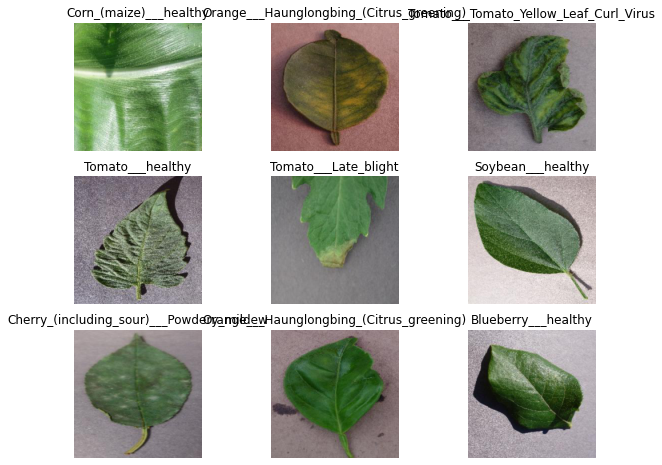

In [6]:
dls.train.show_batch(nrows=3, figsize=(10,8))

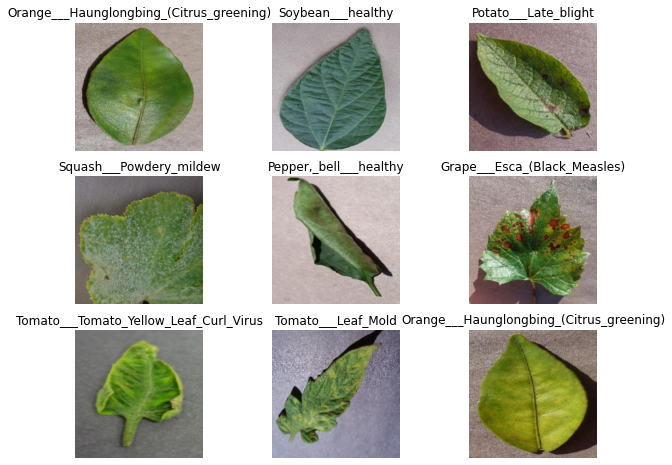

In [7]:
dls.valid.show_batch(nrows=3, figsize=(10,8))

In [9]:
model = cnn_learner(dls, models.resnet34, metrics=[accuracy, error_rate])


E:\Users\Friends\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
E:\Users\Friends\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Users\Friends\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.256096,0.110733,0.964736,0.035264,2:17:36
1,0.102436,0.050218,0.984624,0.015376,3:15:09
2,0.047856,0.030214,0.990332,0.009668,4:26:18
3,0.024600,0.020139,0.993095,0.006905,3:16:36
4,0.021102,0.019877,0.994199,0.005801,3:08:46


In [13]:
model.export('export.pkl')

In [8]:
import pathlib

temp = pathlib.WindowsPath
pathlib.PosixPath = pathlib.WindowsPath

export_file_path = 'C:/Users/Friends/Downloads/PlantDiseaseDetection_f/PlantD_D/models/export.pkl'

model = load_learner(export_file_path, 'export.pkl')

In [9]:
# Get predictions for the validation set
preds, targets = model.get_preds(dl=dls.valid)

# Get predicted labels
pred_labels = preds.argmax(dim=1)

# Convert targets tensor to numpy array
true_labels = targets.numpy()


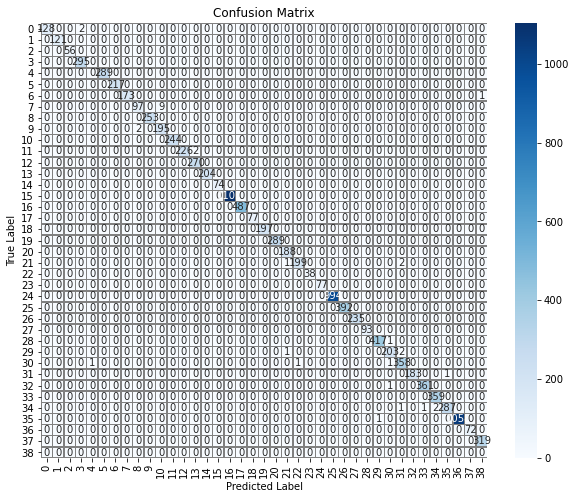

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix with grid lines
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



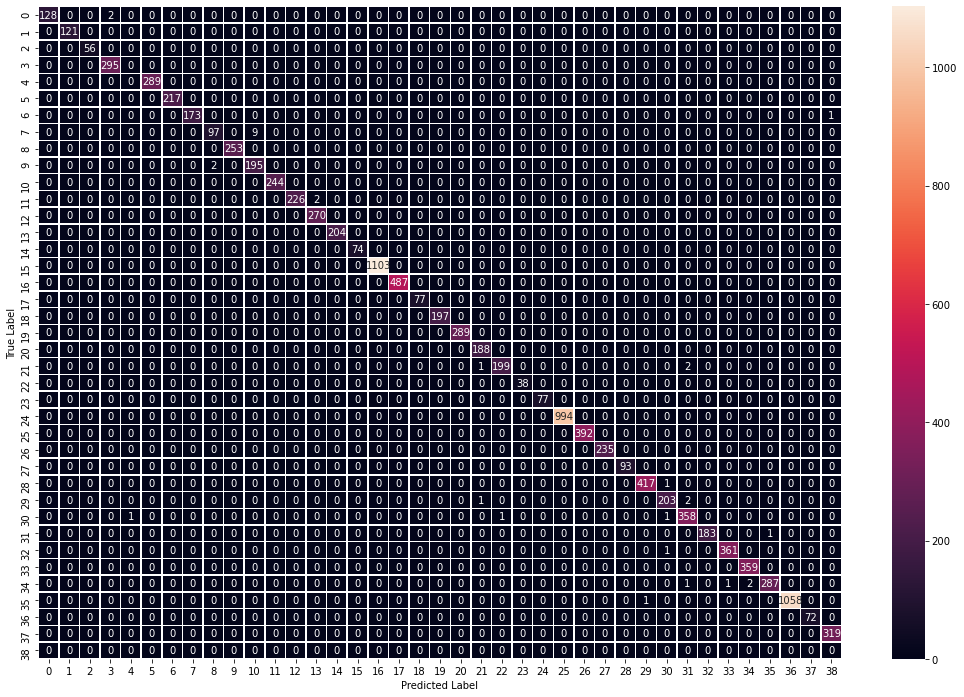

In [20]:
# Calculating and plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(18, 12))
sns.heatmap(confusion_mat, annot=True, fmt="d", linewidths=0.5, linecolor='white')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()